# How to handle data in python using Pandas. 
Pandas is like Excel, but does not suck.  Anything you need to do with data, you can do with pandas.  Im going to focus on the 20% of the things that do 80% of the work. 

In [1]:
import pandas as pd
import numpy as np

# Ignore these next two lines
from IPython.display import Image
pd.set_option('display.max_rows', 5)

# Importing data
* If data is seperated by `;`, change to `sep=';'`
* Shift+Tab is your best friend

In [2]:
df = pd.read_csv('data/listings.csv', sep=',')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,175,3,48,2019-11-04,0.37,2,365
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,75,1,340,2020-08-01,4.75,1,265
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,50,2019-12-02,0.37,1,365
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66120,-73.99423,Entire home/apt,175,14,1,2014-01-02,0.01,1,295
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,65,2,473,2020-03-15,3.44,1,340


# Basic Syntax
* Select one column
* Select multiple columns
   * Must use a list

In [3]:
# SELECT ONE COLUMN
df['id']

0            2595
1            3831
           ...   
46525    44814944
46526    44818009
Name: id, Length: 46527, dtype: int64

In [4]:
# SELECT MULTIPLE COLUMNS
df[ ['id', 'name'] ]

,id,name
0,2595,Skylit Midtown Castle
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r..."
...,...,...
46525,44814944,Upper West Side studio 86th Street
46526,44818009,"5MIN D/N trains, NEAR THE BEACH, 50’ TO MANHATTAN"


### Selecting rows.

In [5]:
df.iloc[0]

id                                                 2595
name                              Skylit Midtown Castle
                                          ...          
calculated_host_listings_count                        2
availability_365                                    365
Name: 0, Length: 16, dtype: object

In [6]:
rows = [0,10,100]
df.loc[rows]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,175,3,48,2019-11-04,0.37,2,365
10,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,65,30,29,2020-07-25,0.22,1,197
100,29628,Sunny Room in New Condo,127608,Chris,Brooklyn,Clinton Hill,40.68414,-73.96351,Private room,89,3,281,2020-02-17,2.26,1,364


### Select row and column

In [7]:
df.at[ 0, 'name' ]

'Skylit Midtown Castle'

# Basic Math
Lets say we wanted to up the price 100x

In [8]:
df['new_price'] = df['price'] * 100

In [9]:
df.price.sum()

6914176

In [10]:
df.price.mean()

148.60566982612247

Let's find the minimum booking amout by multiplying price by minimum_nights
* note, you can also access columns by using a dot `.`

In [11]:
df['min_booking_amount'] = df.price * df.minimum_nights
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,new_price,min_booking_amount
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,175,3,48,2019-11-04,0.37,2,365,17500,525
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,75,1,340,2020-08-01,4.75,1,265,7500,75
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,50,2019-12-02,0.37,1,365,6000,1740
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66120,-73.99423,Entire home/apt,175,14,1,2014-01-02,0.01,1,295,17500,2450
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,65,2,473,2020-03-15,3.44,1,340,6500,130


# Selecting / Filtering data

In [12]:
# Create our select condition.
select_condition = df['neighbourhood_group'] == 'Manhattan'

# Print the dataframe that meets our condition. 
df[ select_condition ]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,new_price,min_booking_amount
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,175,3,48,2019-11-04,0.37,2,365,17500,525
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,65,2,473,2020-03-15,3.44,1,340,6500,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46523,44807786,Cozy & comfy apt in the heart of Inwood Manhattan,284790520,Salar,Manhattan,Washington Heights,40.85820,-73.92733,Entire home/apt,87,6,0,NaN,NaN,2,85,8700,522
46525,44814944,Upper West Side studio 86th Street,4039777,Fernando,Manhattan,Upper West Side,40.78731,-73.97029,Entire home/apt,80,30,0,NaN,NaN,1,113,8000,2400


In [13]:
# Select Brooklyn
condition_1 = df['neighbourhood_group'] == 'Brooklyn'

# Select Prices that are higher than 500
condition_2 = df['price'] > 500

# Select all data that meets both requirments
df[condition_1 & condition_2]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,new_price,min_booking_amount
67,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,2000,1,25,2016-08-04,0.21,1,134,200000,2000
125,38663,Luxury Brownstone in Boerum Hill,165789,Sarah,Brooklyn,Boerum Hill,40.68559,-73.98094,Entire home/apt,650,3,23,2018-12-31,0.23,1,365,65000,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46216,44530152,1 bedroom apartment in Bushwick!,10932987,Suad,Brooklyn,Bedford-Stuyvesant,40.68685,-73.92113,Private room,1118,30,0,NaN,NaN,1,122,111800,33540
46337,44625524,Renovated Brownstone w/ Yard Near Prospect Park,2771914,Ian,Brooklyn,Windsor Terrace,40.65772,-73.97696,Entire home/apt,995,5,0,NaN,NaN,1,23,99500,4975


## Using 'or' statments
* What if we want to find all listings in Midtown or DUMBO
* The 'or' in python is the pipe thing `|`

In [14]:
condition_1 = df.neighbourhood == 'Midtown'

condition_2 = df.neighbourhood == 'DUMBO'

# Select all data that meets condition 1 or condition 2
df[ condition_1 | condition_2]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,new_price,min_booking_amount
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,175,3,48,2019-11-04,0.37,2,365,17500,525
187,59855,One bedroom Apt. in NYC,288031,Leslie,Manhattan,Midtown,40.75890,-73.96991,Entire home/apt,250,30,82,2016-01-05,0.69,1,227,25000,7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46480,44743937,443 Studio,99067861,Eliza Sabet,Manhattan,Midtown,40.74743,-73.98855,Private room,66,1,0,NaN,NaN,44,361,6600,66
46495,44758487,Large Charming Studio in Midtown East Manhattan,113107378,Susan,Manhattan,Midtown,40.75655,-73.96501,Entire home/apt,80,29,0,NaN,NaN,1,166,8000,2320


## Using `.isin`. A very handy selector tool.

In [16]:
# Here is a list of ids we want to select
list_of_host_ids = [19303369, 29871437, 63953718, 32084117]

# Make our select condition 
condition = df.host_id.isin(list_of_host_ids)

# Make the selection
df[condition]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,new_price,min_booking_amount
6630,6130145,Moma Casanova. New Additions!,29871437,Ester,Queens,Sunnyside,40.74315,-73.91733,Private room,78,3,130,2020-03-10,2.03,1,339,7800,234
9282,8627973,"2BR2BA apartment, PRIVATE bathroom & AC inside",19303369,Hiroki,Queens,Elmhurst,40.74073,-73.87591,Private room,40,29,2,2020-01-02,0.13,98,31,4000,1160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46252,44555814,Close to Manhattan! Comfortable area to stay♪,19303369,Hiroki,Queens,Sunnyside,40.73926,-73.92557,Private room,28,30,0,NaN,NaN,98,45,2800,840
46295,44580140,"Cozy room&house in Woodside, comfortable are!!",19303369,Hiroki,Queens,Woodside,40.74289,-73.89598,Private room,25,30,0,NaN,NaN,98,31,2500,750


In [17]:
# Here is a list of ids we want to select
list_of_host_ids = [19303369, 29871437, 63953718, 32084117]

# Make our select condition 
condition = df.host_id.isin(list_of_host_ids)

### USING THE `~` WILL SELECT THE INVERSE OF THE CONDITION
df[~condition]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,new_price,min_booking_amount
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,175,3,48,2019-11-04,0.37,2,365,17500,525
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,75,1,340,2020-08-01,4.75,1,265,7500,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46525,44814944,Upper West Side studio 86th Street,4039777,Fernando,Manhattan,Upper West Side,40.78731,-73.97029,Entire home/apt,80,30,0,NaN,NaN,1,113,8000,2400
46526,44818009,"5MIN D/N trains, NEAR THE BEACH, 50’ TO MANHATTAN",48098268,Marina,Brooklyn,Gravesend,40.59945,-73.98209,Private room,66,1,0,NaN,NaN,1,38,6600,66


In [18]:
list_of_neighbourhoods = ['DUMBO', 'Midtown']

condition = df.neighbourhood.isin(list_of_neighbourhoods)

df[condition]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,new_price,min_booking_amount
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,175,3,48,2019-11-04,0.37,2,365,17500,525
187,59855,One bedroom Apt. in NYC,288031,Leslie,Manhattan,Midtown,40.75890,-73.96991,Entire home/apt,250,30,82,2016-01-05,0.69,1,227,25000,7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46480,44743937,443 Studio,99067861,Eliza Sabet,Manhattan,Midtown,40.74743,-73.98855,Private room,66,1,0,NaN,NaN,44,361,6600,66
46495,44758487,Large Charming Studio in Midtown East Manhattan,113107378,Susan,Manhattan,Midtown,40.75655,-73.96501,Entire home/apt,80,29,0,NaN,NaN,1,166,8000,2320


# Assigning values to filtered columns using `np.where()`
* np.where is a handy tool that takes in a condition statement, followed by what value to set when condition is true, and then what value to set when condition is false.  
* `np.where(condition, when_true, when_false)` 

### We want a new column that whenever a listing is in Williamsburg, set it equal to 1, else, 0. 

In [19]:
c1 = df['neighbourhood'] == 'Williamsburg'

df['is_in_williamsburg'] = np.where(c1, 1, 0)

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,new_price,min_booking_amount,is_in_williamsburg
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,175,3,48,2019-11-04,0.37,2,365,17500,525,0
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,75,1,340,2020-08-01,4.75,1,265,7500,75,0
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,50,2019-12-02,0.37,1,365,6000,1740,0
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66120,-73.99423,Entire home/apt,175,14,1,2014-01-02,0.01,1,295,17500,2450,0
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,65,2,473,2020-03-15,3.44,1,340,6500,130,0


In [20]:
# You can do it with multiple conditions as well...

# First select condition.
c1 = df['neighbourhood'] == 'Williamsburg'

# Second select condition.
c2 = df['room_type'] == 'Private room'

# Set equal to one when both conditions are true, and zero when not true.
df['private_room_in_williamsburg'] =  np.where( c1 & c2, 1, 0 )

# Sanity check to view if our assignment worked correctly.
df[df['private_room_in_williamsburg'] == 1]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,new_price,min_booking_amount,is_in_williamsburg,private_room_in_williamsburg
42,15385,"Very, very cozy place",60252,Cristina,Brooklyn,Williamsburg,40.71185,-73.96204,Private room,80,7,49,2020-02-07,0.39,1,229,8000,560,1,1
63,18764,Cozy 2 BR in Williamsburg,72014,Yvelisa,Brooklyn,Williamsburg,40.71154,-73.96112,Private room,145,3,63,2019-08-04,0.50,2,365,14500,435,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46364,44640377,HUGE BEDROOM WITH PRIVATE BATHROOM IN WILLIAMS...,64191321,Gg,Brooklyn,Williamsburg,40.71307,-73.93765,Private room,55,3,0,NaN,NaN,2,324,5500,165,1,1
46517,44802032,A very large room in Williamsburg,213793805,Omer,Brooklyn,Williamsburg,40.71970,-73.95632,Private room,55,14,0,NaN,NaN,1,45,5500,770,1,1


# Applying a functions to a column

In [21]:
def my_function(x):
    if 'Furnished' in str(x):
        return 1
    else:
        return 0

df['is_furnished'] = df.name.apply(my_function)

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,new_price,min_booking_amount,is_in_williamsburg,private_room_in_williamsburg,is_furnished
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,175,...,48,2019-11-04,0.37,2,365,17500,525,0,0,0
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,75,...,340,2020-08-01,4.75,1,265,7500,75,0,0,0
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,...,50,2019-12-02,0.37,1,365,6000,1740,0,0,0
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66120,-73.99423,Entire home/apt,175,...,1,2014-01-02,0.01,1,295,17500,2450,0,0,0
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,65,...,473,2020-03-15,3.44,1,340,6500,130,0,0,1


# Grouping

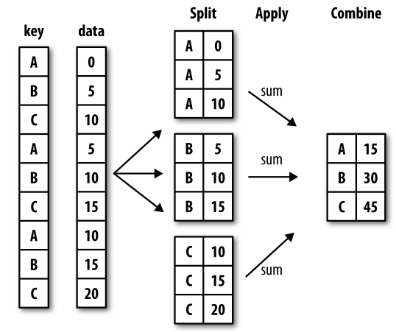

In [22]:
Image('https://i.stack.imgur.com/sgCn1.jpg')

Doing a groupby does nothing unless you apply a function to a column of the groupby object.

In [23]:
df.groupby('neighbourhood_group')

## After the groupby, select a column then select the function you want to perform on said column.

In [24]:
df.groupby('neighbourhood_group')['price'].mean()

neighbourhood_group
Bronx             92.751479
Brooklyn         120.225258
Manhattan        191.880466
Queens            99.754965
Staten Island    110.947214
Name: price, dtype: float64

# You can use `.agg` to do multiple functions on said column.

In [25]:
df.groupby('neighbourhood_group')['price'].agg(['count', 'min', 'max', 'mean', 'median', 'std', 'sum'])

,count,min,max,mean,median,std,sum
neighbourhood_group,,,,,,,
Bronx,1183,16,1404,92.751479,69,95.787081,109725
Brooklyn,18632,0,10000,120.225258,90,180.136376,2240037
Manhattan,20580,0,10000,191.880466,129,428.682578,3948900
Queens,5791,0,10000,99.754965,70,207.648739,577681
Staten Island,341,19,1200,110.947214,79,122.676152,37833


# Double groupby

In [26]:
groupby_cols = ['neighbourhood_group', 'neighbourhood']
df.groupby(groupby_cols)['price'].mean()

neighbourhood_group  neighbourhood
Bronx                Allerton          92.813953
                     Baychester        81.750000
                                         ...    
Staten Island        Willowbrook      309.000000
                     Woodrow          700.000000
Name: price, Length: 222, dtype: float64

# Making a DataFrame out of a groupby 
* This is somewhat nuanced, but something I find people struggle on and is very handy to know how to do.

In [27]:
# Do your group by
gb = df.groupby('neighbourhood_group')['price'].mean()

# Convert it to a DataFrame
new_df = pd.DataFrame(gb)

# Reset the index
new_df = new_df.reset_index()

# Check it out
new_df

,neighbourhood_group,price
0,Bronx,92.751479
1,Brooklyn,120.225258
2,Manhattan,191.880466
3,Queens,99.754965
4,Staten Island,110.947214


# Very helpful tools
* `df.describe()`
* `df.info`
* `df.shape`
* `df['column'].value_counts()`
* `df['column'].apply(function)`
* `df.dropna(subset=[columns])`

In [28]:
pd.set_option('display.max_rows', 10)
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,new_price,min_booking_amount,is_in_williamsburg,private_room_in_williamsburg,is_furnished
count,4.652700e+04,4.652700e+04,46527.000000,46527.000000,46527.00000,46527.000000,46527.000000,35816.000000,46527.000000,46527.000000,46527.000000,4.652700e+04,46527.000000,46527.000000,46527.000000
mean,2.299891e+07,8.439186e+07,40.729563,-73.950918,148.60567,8.519634,22.767167,0.905802,5.890451,121.142842,14860.566983,1.372545e+03,0.074924,0.038279,0.006104
std,1.373123e+07,9.913260e+07,0.054974,0.047562,318.62788,23.050570,46.603900,1.280898,22.731346,142.517750,31862.788022,1.046096e+04,0.263272,0.191871,0.077890
min,2.595000e+03,2.438000e+03,40.508680,-74.239860,0.00000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1.062558e+07,9.194284e+06,40.689945,-73.983170,65.00000,2.000000,1.000000,0.120000,1.000000,0.000000,6500.000000,1.400000e+02,0.000000,0.000000,0.000000
50%,2.220528e+07,3.719496e+07,40.724400,-73.955380,100.00000,3.000000,4.000000,0.380000,1.000000,46.000000,10000.000000,3.200000e+02,0.000000,0.000000,0.000000
75%,3.575440e+07,1.362274e+08,40.763040,-73.934170,160.00000,6.000000,21.000000,1.210000,2.000000,252.000000,16000.000000,8.500000e+02,0.000000,0.000000,0.000000
max,4.481801e+07,3.624537e+08,40.911690,-73.712990,10000.00000,1250.000000,746.000000,46.240000,249.000000,365.000000,1000000.000000,1.170000e+06,1.000000,1.000000,1.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46527 entries, 0 to 46526
Data columns (total 21 columns):
id                                46527 non-null int64
name                              46509 non-null object
host_id                           46527 non-null int64
host_name                         46492 non-null object
neighbourhood_group               46527 non-null object
neighbourhood                     46527 non-null object
latitude                          46527 non-null float64
longitude                         46527 non-null float64
room_type                         46527 non-null object
price                             46527 non-null int64
minimum_nights                    46527 non-null int64
number_of_reviews                 46527 non-null int64
last_review                       35816 non-null object
reviews_per_month                 35816 non-null float64
calculated_host_listings_count    46527 non-null int64
availability_365                  46527 non-null int64

# How to find percentages of the whole using `value_counts`

In [30]:
df.neighbourhood_group.value_counts()

Manhattan        20580
Brooklyn         18632
Queens            5791
Bronx             1183
Staten Island      341
Name: neighbourhood_group, dtype: int64

In [40]:
dfp = df.neighbourhood_group.value_counts() / df.neighbourhood_group.value_counts().sum()
dfp

Manhattan        0.442324
Brooklyn         0.400456
Queens           0.124465
Bronx            0.025426
Staten Island    0.007329
Name: neighbourhood_group, dtype: float64

# Joins

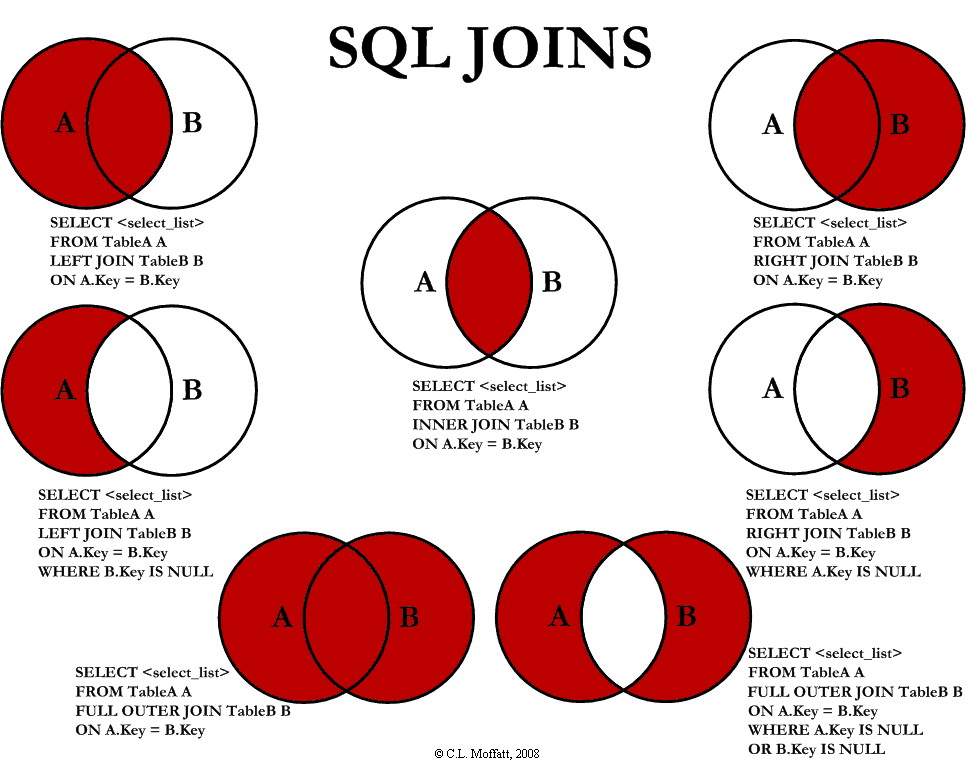

In [41]:
Image('https://i.stack.imgur.com/UI25E.jpg')

In [34]:
dfprices = pd.read_csv('data/prices.csv')
dfprices

,neighbourhood_group,mean_price
0,Bronx,92.751479
1,Brooklyn,120.225258
2,Manhattan,191.880466
3,Queens,99.754965
4,Staten Island,110.947214


In [35]:
dflistings = pd.read_csv('data/n_listings.csv')
dflistings

,neighbourhood_group,n_listings
0,Bronx,1183
1,Brooklyn,18632
2,Manhattan,20580
3,LongIsland,4121


In [36]:
# Merge defaults to an inner-join
pd.merge(dfprices, dflistings, on='neighbourhood_group')

,neighbourhood_group,mean_price,n_listings
0,Bronx,92.751479,1183
1,Brooklyn,120.225258,18632
2,Manhattan,191.880466,20580


In [37]:
# Doing a left join keeps all values in the left table
dfjoined = pd.merge(dfprices, dflistings, on='neighbourhood_group', how='left')
dfjoined

,neighbourhood_group,mean_price,n_listings
0,Bronx,92.751479,1183.0
1,Brooklyn,120.225258,18632.0
2,Manhattan,191.880466,20580.0
3,Queens,99.754965,NaN
4,Staten Island,110.947214,NaN


# Exporting data
* Almost always use `index=False` when saving your csv

In [38]:
# This is the name of your new file
save_as = 'my-data-file.csv'

# This is the method you use, DONT FORGET INDEX=FALSE!
df.to_csv(save_as, index=False)

In [39]:
# Another fun way to get your data out.
df.to_clipboard(index=False)

# Now open up the Exercise notebook and begin your journey into Pandas.